In [250]:
import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

LOAD DATA

In [251]:
data = pd.read_csv('/Users/muhammadpandu/Documents/semester 2 Pandu/Ipsd/adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


PROSES DATA

In [252]:
print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())



Jumlah Missing Values per Kolom:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [253]:
# Mengecek apakah ada baris duplikat
duplikat = data.duplicated()

# Menampilkan jumlah baris yang duplikat
print("Jumlah baris duplikat:", duplikat.sum())

# Jika ingin melihat baris mana yang duplikat, gunakan:
dta = data[data.duplicated()]
print("\nBaris yang duplikat:")
dta


Jumlah baris duplikat: 52

Baris yang duplikat:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [254]:
dta = dta.drop_duplicates()
dta

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21385,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [255]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mengganti '?' dengan NaN
dta.replace('?', np.nan, inplace=True)

# Memeriksa jumlah nilai yang hilang
print(dta.isnull().sum())

# Mengisi missing values untuk kolom kategorikal dengan modus
for column in dta.select_dtypes(include=['object']).columns:
    dta[column].fillna(dta[column].mode()[0], inplace=True)

# Mengisi missing values untuk kolom numerik dengan rata-rata
for column in dta.select_dtypes(include=['float64', 'int64']).columns:
    dta[column].fillna(dta[column].mean(), inplace=True)

# Memeriksa kembali apakah ada nilai yang hilang
print(dta.isnull().sum())


age                0
workclass          4
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         4
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     1
income             0
dtype: int64
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_2475/296924862.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta.replace('?', np.nan, inplace=True)
/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_2475/296924862.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dta[column].fillna(dta[column].mode()[0], inplace=Tru

In [256]:
dta

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21385,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [257]:
df = dta
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21385,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


SUMMARY STATISTIK DATA

In [258]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
             age         fnlwgt  educational-num  capital-gain  capital-loss  \
count  49.000000      49.000000        49.000000          49.0          49.0   
mean   30.387755  181177.081633         9.653061           0.0           0.0   
std    13.264640   93911.879501         2.926538           0.0           0.0   
min    17.000000   30916.000000         1.000000           0.0           0.0   
25%    21.000000  112835.000000         9.000000           0.0           0.0   
50%    25.000000  180317.000000        10.000000           0.0           0.0   
75%    39.000000  243368.000000        11.000000           0.0           0.0   
max    90.000000  379959.000000        14.000000           0.0           0.0   

       hours-per-week  
count       49.000000  
mean        36.755102  
std         10.877214  
min         10.000000  
25%         36.000000  
50%         40.000000  
75%         40.000000  
max         55.000000  


In [259]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,49.000000,49.000000,49.000000,49.0,49.0,49.000000
mean,30.387755,181177.081633,9.653061,0.0,0.0,36.755102
std,13.264640,93911.879501,2.926538,0.0,0.0,10.877214
min,17.000000,30916.000000,1.000000,0.0,0.0,10.000000
25%,21.000000,112835.000000,9.000000,0.0,0.0,36.000000
50%,25.000000,180317.000000,10.000000,0.0,0.0,40.000000
75%,39.000000,243368.000000,11.000000,0.0,0.0,40.000000
max,90.000000,379959.000000,14.000000,0.0,0.0,55.000000


In [260]:
df_numeric = df.select_dtypes(include=[np.number])

# 1. Variance (varians)
variance = df_numeric.var()

# 2. Range
range_values = df_numeric.max() - df_numeric.min()

# 3. Percentile (misal persentil ke-25, 50, 75)
percentile_25 = df_numeric.quantile(0.25)
percentile_50 = df_numeric.quantile(0.50)  # Median
percentile_75 = df_numeric.quantile(0.75)

# 4. Z-scores (Z-skor untuk setiap kolom numerik)
z_scores = df_numeric.apply(lambda x: stats.zscore(x))

# Cetak hasil
print("Variance:\n", variance)
print("\nRange:\n", range_values)
print("\nZ-scores:\n", z_scores)

Variance:
 age                1.759507e+02
fnlwgt             8.819441e+09
educational-num    8.564626e+00
capital-gain       0.000000e+00
capital-loss       0.000000e+00
hours-per-week     1.183138e+02
dtype: float64

Range:
 age                    73
fnlwgt             349043
educational-num        13
capital-gain            0
capital-loss            0
hours-per-week         45
dtype: int64

Z-scores:
             age    fnlwgt  educational-num  capital-gain  capital-loss  \
864   -0.486553  0.144735         1.155503           NaN           NaN   
11189  0.503652 -1.380408         1.155503           NaN           NaN   
11212 -0.105705 -1.557172         1.155503           NaN           NaN   
13848 -0.029535 -0.009253         0.465019           NaN           NaN   
15960 -0.943571  2.117932        -0.570706           NaN           NaN   
18476  0.655992  0.037461        -0.225464           NaN           NaN   
19399 -0.867401 -0.545958        -2.296914           NaN           NaN   


In [261]:
print("\nPercentile 25%:\n", percentile_25)
print("\nPercentile 50% (Median):\n", percentile_50)
print("\nPercentile 75%:\n", percentile_75)


Percentile 25%:
 age                    21.0
fnlwgt             112835.0
educational-num         9.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         36.0
Name: 0.25, dtype: float64

Percentile 50% (Median):
 age                    25.0
fnlwgt             180317.0
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
Name: 0.5, dtype: float64

Percentile 75%:
 age                    39.0
fnlwgt             243368.0
educational-num        11.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
Name: 0.75, dtype: float64


In [262]:
print("\nZ-scores:\n", z_scores)


Z-scores:
             age    fnlwgt  educational-num  capital-gain  capital-loss  \
864   -0.486553  0.144735         1.155503           NaN           NaN   
11189  0.503652 -1.380408         1.155503           NaN           NaN   
11212 -0.105705 -1.557172         1.155503           NaN           NaN   
13848 -0.029535 -0.009253         0.465019           NaN           NaN   
15960 -0.943571  2.117932        -0.570706           NaN           NaN   
18476  0.655992  0.037461        -0.225464           NaN           NaN   
19399 -0.867401 -0.545958        -2.296914           NaN           NaN   
19726  0.808331 -0.697009         1.155503           NaN           NaN   
20606 -0.410383  1.365990         1.155503           NaN           NaN   
21385  4.540644 -1.385615         0.119778           NaN           NaN   
24361 -0.715062  0.669089        -2.987397           NaN           NaN   
25189 -0.105705 -1.505090         1.155503           NaN           NaN   
25452 -0.715062  0.740989 

In [263]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for col in categorical_columns:
    print(f"Frekuensi pada kolom '{col}':")
    print(df[col].value_counts())
    print("\n")

Frekuensi pada kolom 'workclass':
workclass
Private             47
Self-emp-inc         1
Self-emp-not-inc     1
Name: count, dtype: int64


Frekuensi pada kolom 'education':
education
Some-college    15
HS-grad         14
Bachelors       11
12th             2
5th-6th          2
Assoc-voc        1
Preschool        1
1st-4th          1
7th-8th          1
Masters          1
Name: count, dtype: int64


Frekuensi pada kolom 'marital-status':
marital-status
Never-married            32
Married-civ-spouse       13
Divorced                  3
Married-spouse-absent     1
Name: count, dtype: int64


Frekuensi pada kolom 'occupation':
occupation
Craft-repair         13
Prof-specialty        7
Adm-clerical          5
Machine-op-inspct     5
Exec-managerial       4
Farming-fishing       4
Other-service         4
Sales                 3
Tech-support          1
Priv-house-serv       1
Protective-serv       1
Handlers-cleaners     1
Name: count, dtype: int64


Frekuensi pada kolom 'relationship':
rela

In [264]:
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
age                27
workclass           3
fnlwgt             49
education          10
educational-num    10
marital-status      4
occupation         12
relationship        4
race                3
gender              2
capital-gain        1
capital-loss        1
hours-per-week     12
native-country      4
income              2
dtype: int64


Diagram Distribusi usia

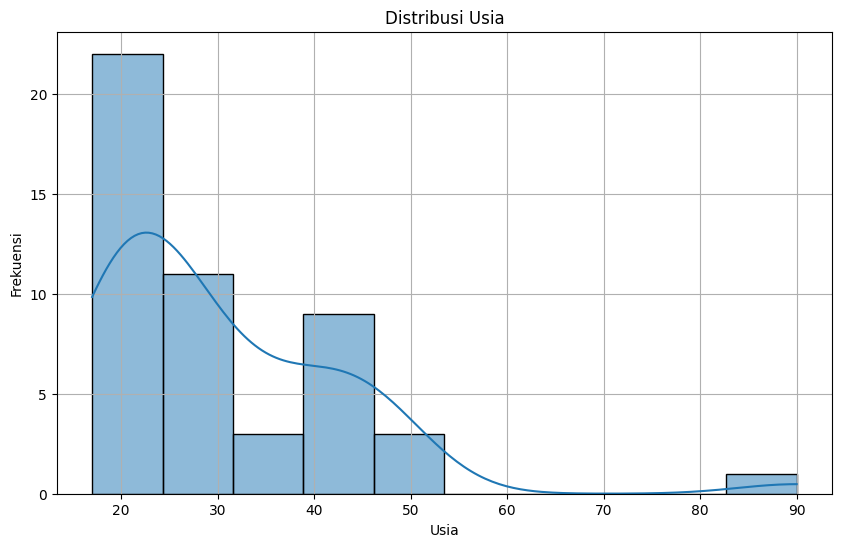

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()


diagram distribusi kerja

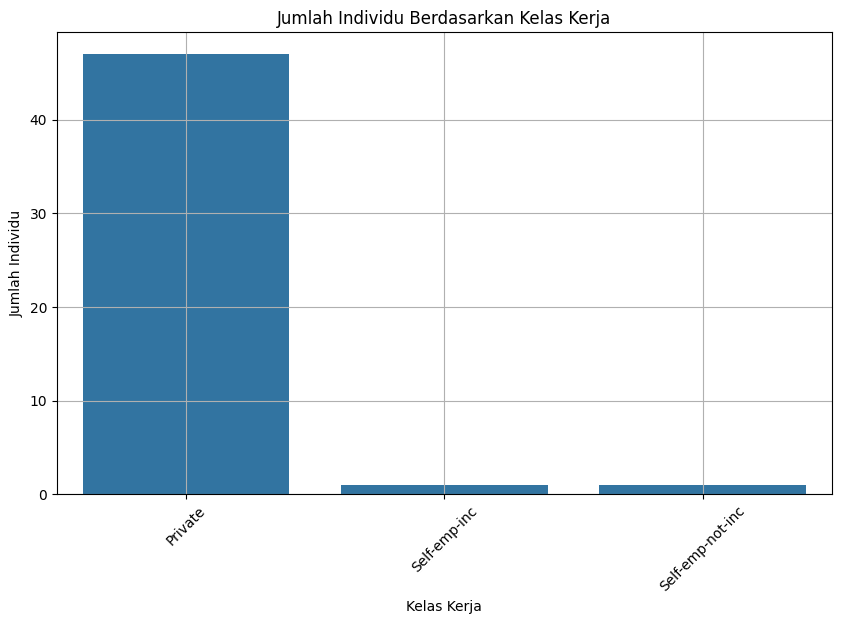

In [266]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='workclass')
plt.title('Jumlah Individu Berdasarkan Kelas Kerja')
plt.xlabel('Kelas Kerja')
plt.ylabel('Jumlah Individu')
plt.xticks(rotation=45)
plt.grid()
plt.show()


diagram pie status pernikahan

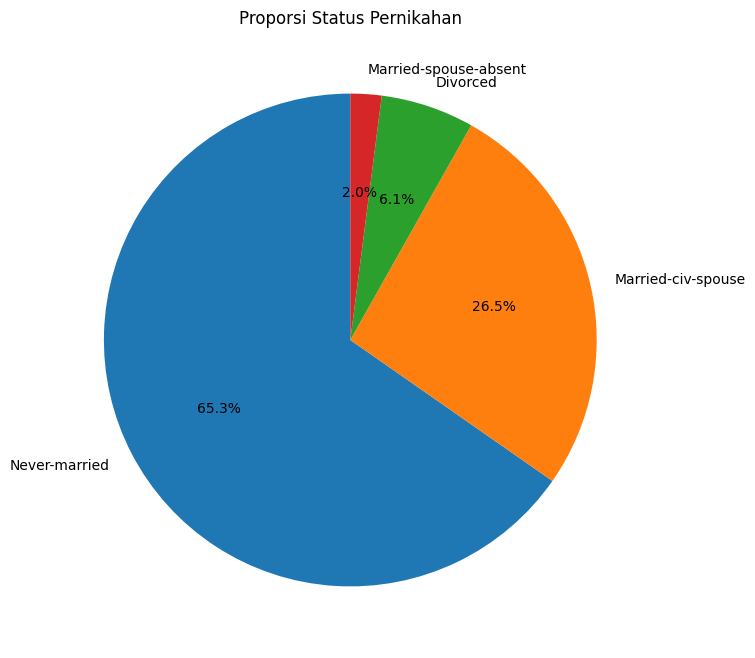

In [267]:
plt.figure(figsize=(8, 8))
df['marital-status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Status Pernikahan')
plt.ylabel('')
plt.grid()
plt.show()


Diagram Seaborn untuk Pendidikan dan Penghasilan

Text(0, 0.5, 'Jam Kerja per Minggu')

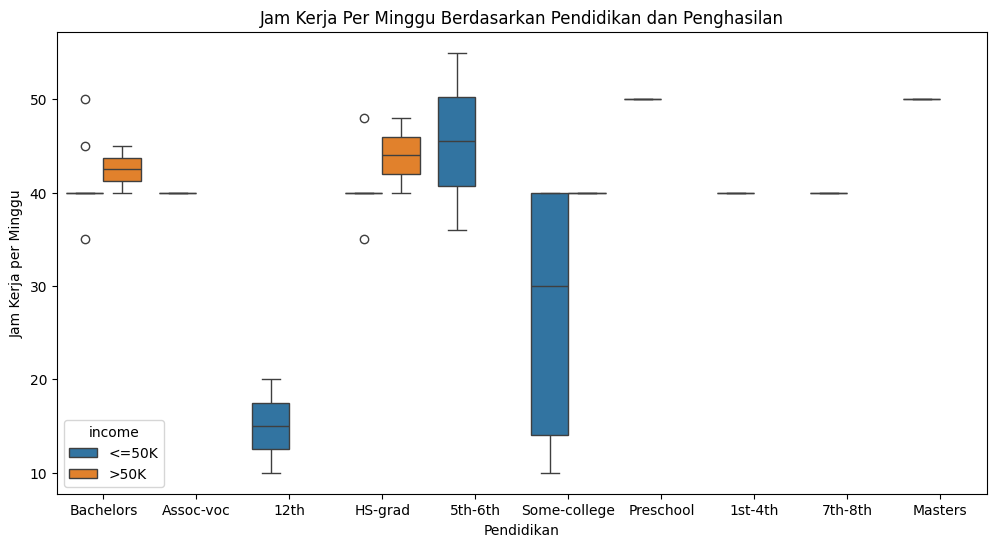

In [268]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='hours-per-week', hue='income')
plt.title('Jam Kerja Per Minggu Berdasarkan Pendidikan dan Penghasilan')
plt.xlabel('Pendidikan')
plt.ylabel('Jam Kerja per Minggu')


Lakukan uji korelasi:
• Jika dekan PT ingin mengetahui apakah ada relationship antara Reading
frequency (non-scientific books/journals) dengan OUTPUT Grade final
• Jika dekan PT ingin mengetahui apakah ada relationship antara Industry
Income Score dengan location?

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 864 to 48685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              49 non-null     int64 
 1   workclass        49 non-null     object
 2   fnlwgt           49 non-null     int64 
 3   education        49 non-null     object
 4   educational-num  49 non-null     int64 
 5   marital-status   49 non-null     object
 6   occupation       49 non-null     object
 7   relationship     49 non-null     object
 8   race             49 non-null     object
 9   gender           49 non-null     object
 10  capital-gain     49 non-null     int64 
 11  capital-loss     49 non-null     int64 
 12  hours-per-week   49 non-null     int64 
 13  native-country   49 non-null     object
 14  income           49 non-null     object
dtypes: int64(6), object(9)
memory usage: 6.1+ KB
None

Missing values:
 age                0
workclass          0
fnlwgt           

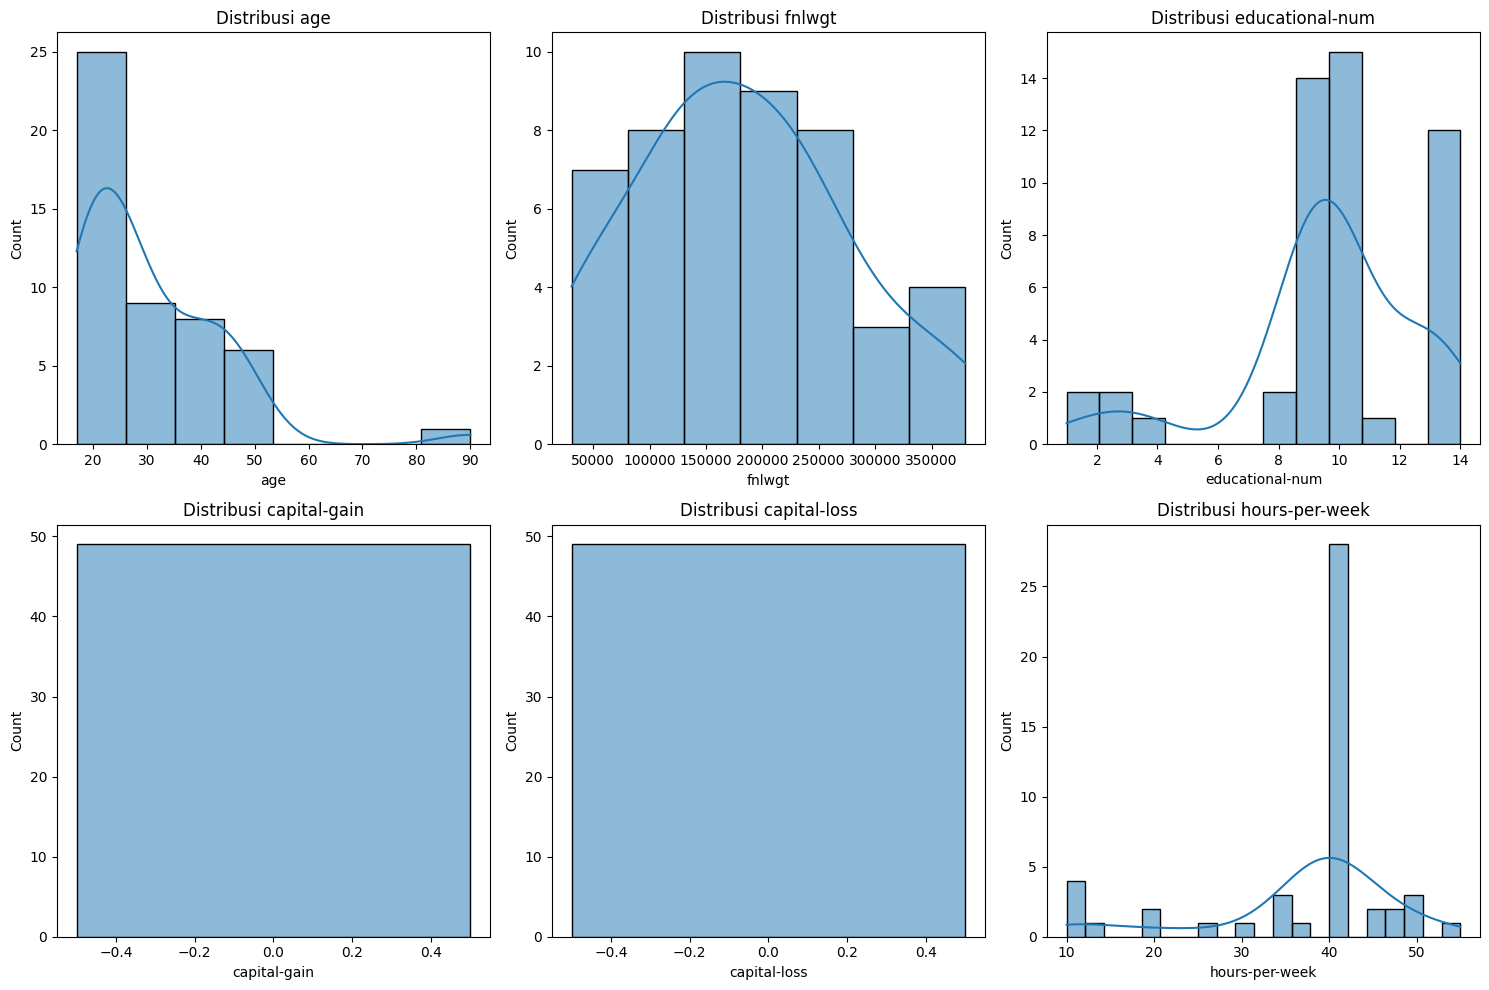


Distribusi workclass:
workclass
Private             0.959184
Self-emp-inc        0.020408
Self-emp-not-inc    0.020408
Name: proportion, dtype: float64

Distribusi education:
education
Some-college    0.306122
HS-grad         0.285714
Bachelors       0.224490
12th            0.040816
5th-6th         0.040816
Assoc-voc       0.020408
Preschool       0.020408
1st-4th         0.020408
7th-8th         0.020408
Masters         0.020408
Name: proportion, dtype: float64

Distribusi marital-status:
marital-status
Never-married            0.653061
Married-civ-spouse       0.265306
Divorced                 0.061224
Married-spouse-absent    0.020408
Name: proportion, dtype: float64

Distribusi occupation:
occupation
Craft-repair         0.265306
Prof-specialty       0.142857
Adm-clerical         0.102041
Machine-op-inspct    0.102041
Exec-managerial      0.081633
Farming-fishing      0.081633
Other-service        0.081633
Sales                0.061224
Tech-support         0.020408
Priv-house-ser

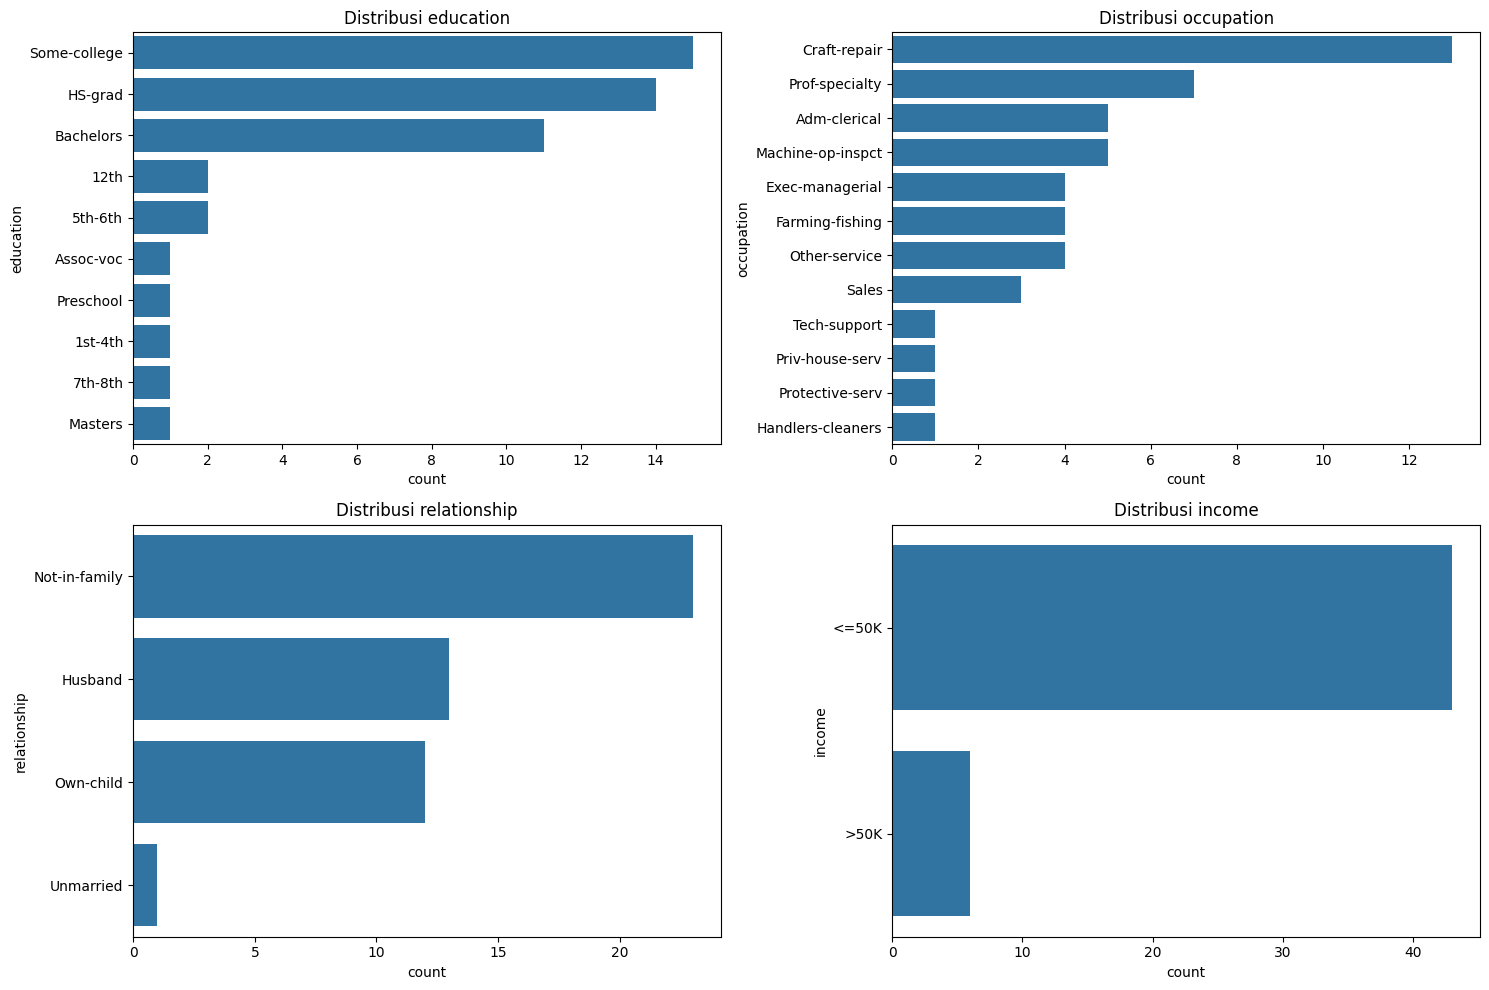

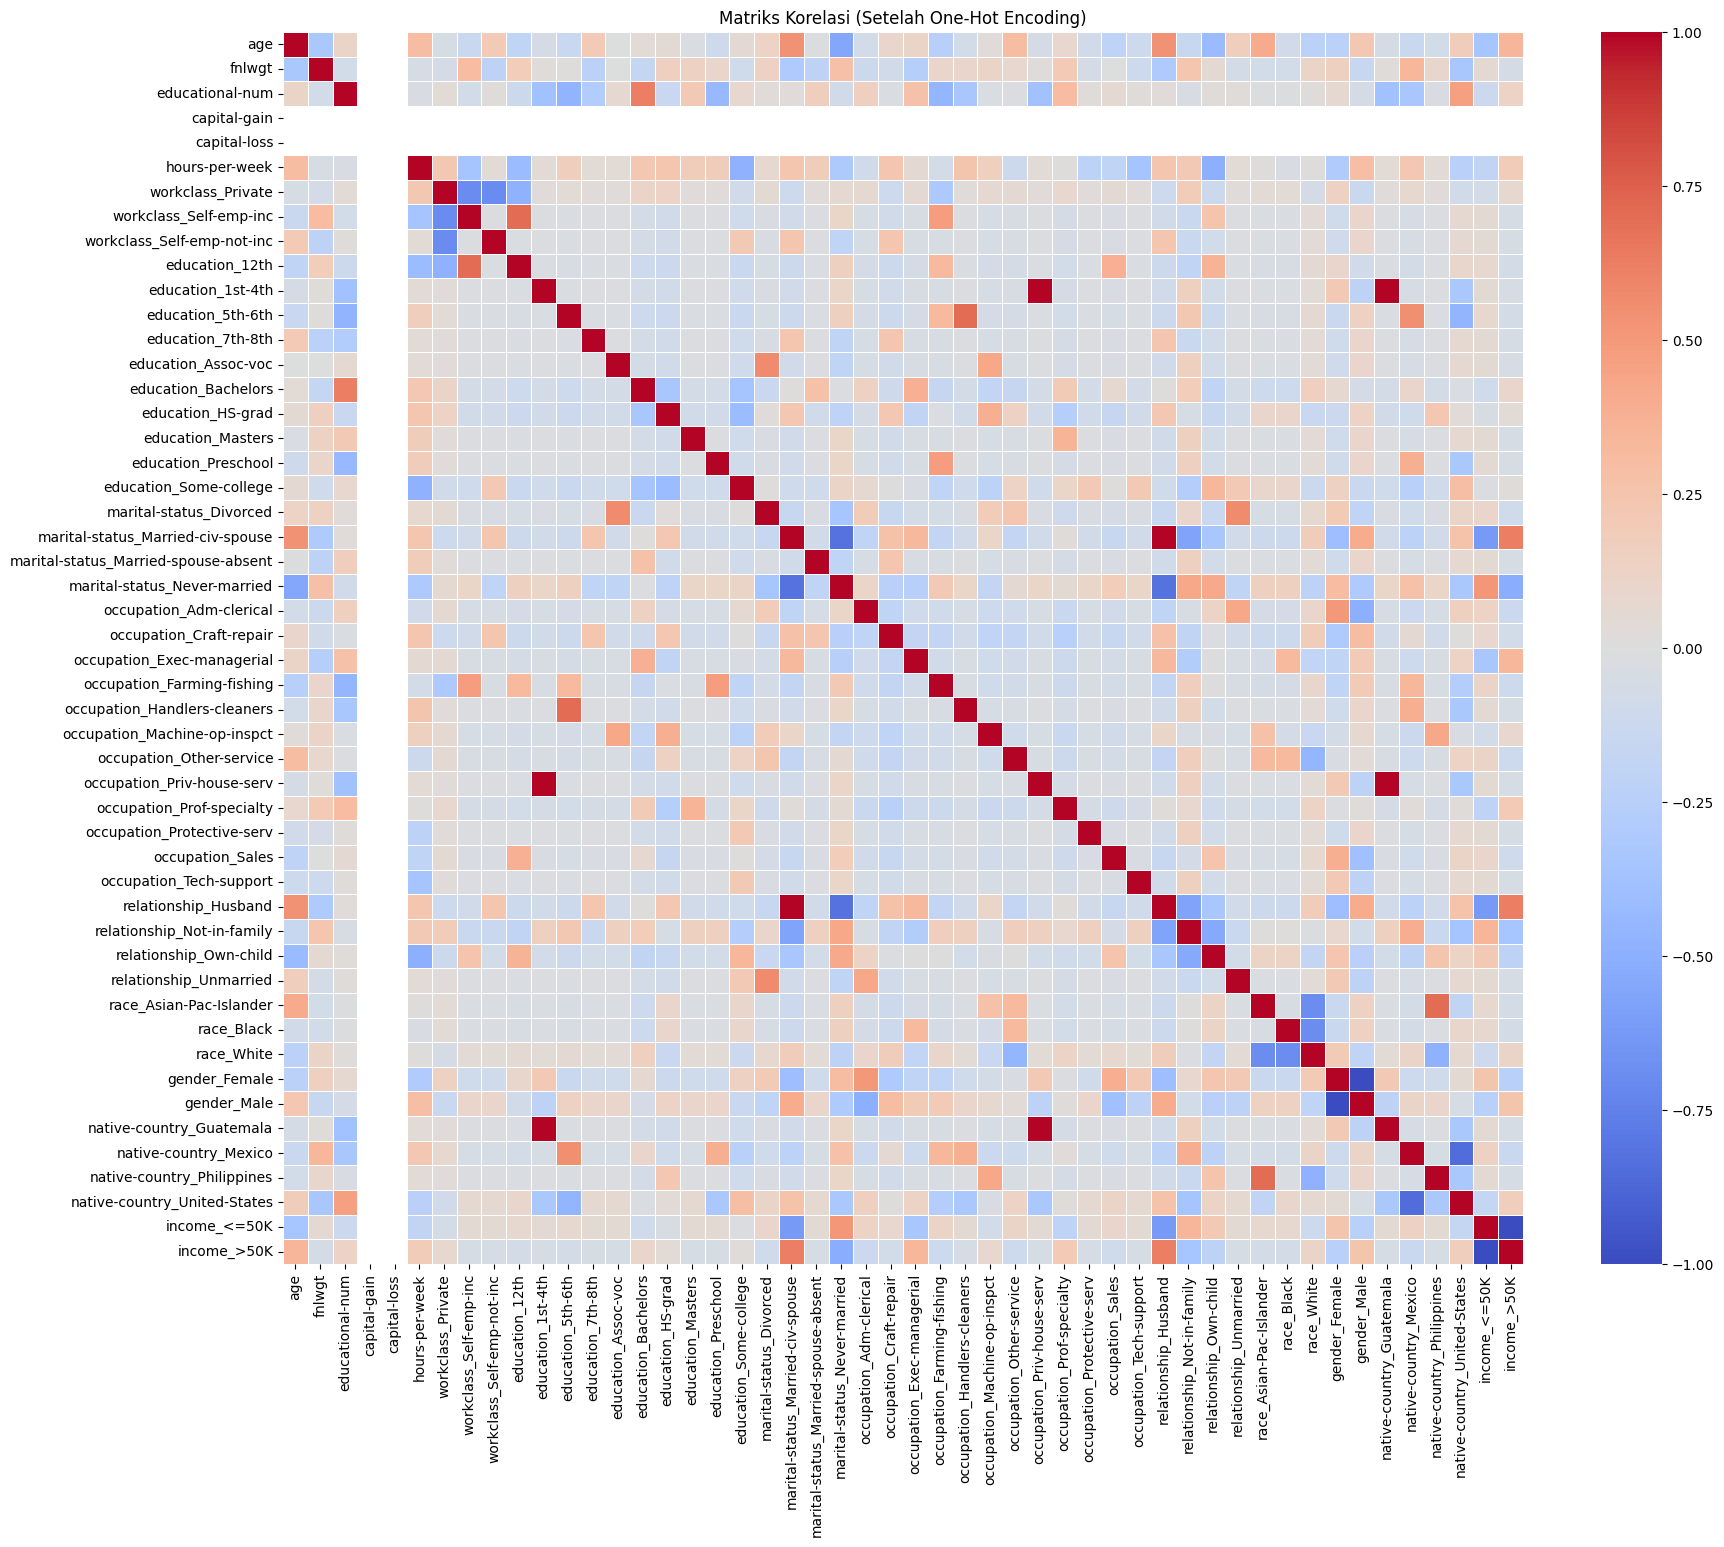

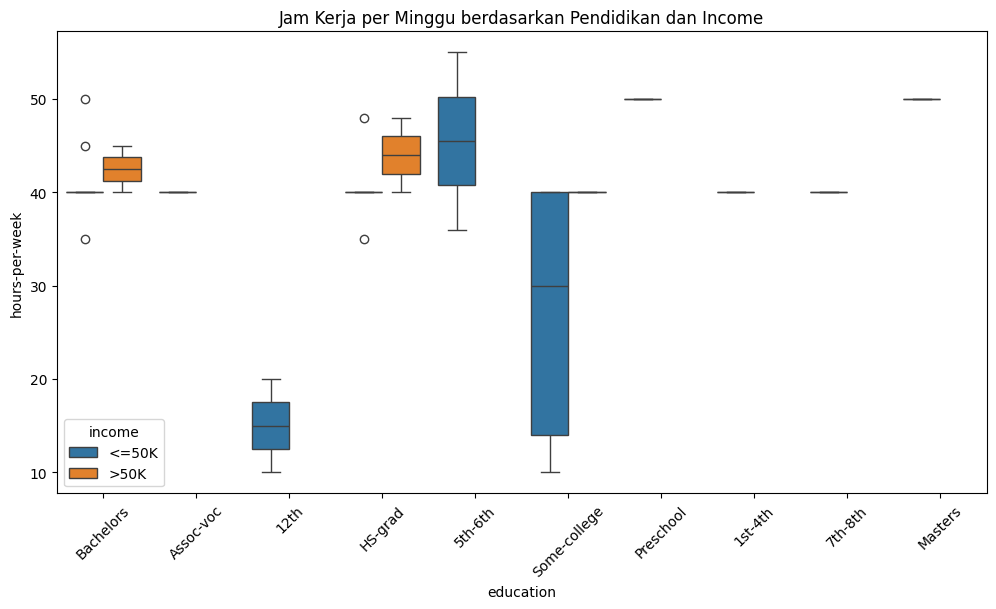


T-test untuk perbedaan jam kerja berdasarkan income:
t-statistic: -1.3105909688224087, p-value: 0.1963643933076207

Analisis 'capital-gain':
count    49.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: capital-gain, dtype: float64

Analisis 'capital-loss':
count    49.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: capital-loss, dtype: float64


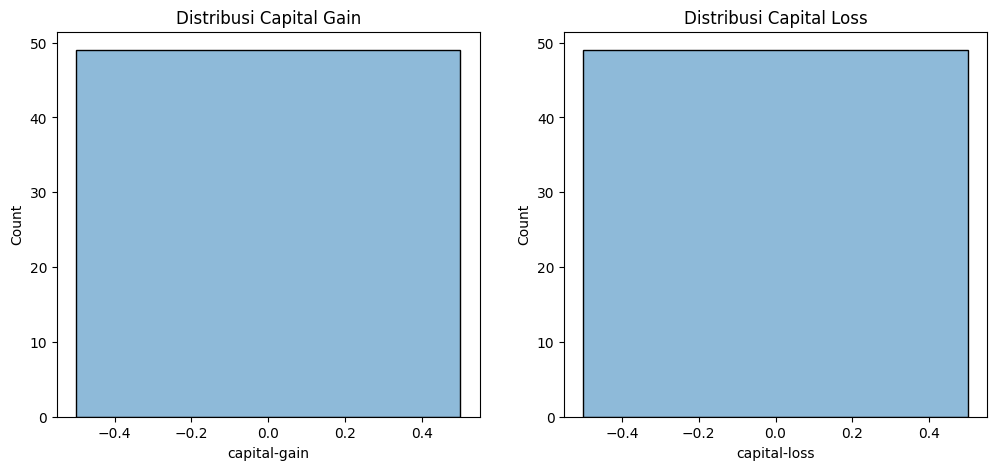

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Asumsikan 'dta' adalah DataFrame Anda
# Jika belum, baca data Anda:
# dta = pd.read_csv('your_data.csv')

# 1. Pemeriksaan Data Awal
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# 2. Analisis Variabel Numerik
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df[numeric_columns].describe())

# Histogram untuk variabel numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# 3. Analisis Variabel Kategorikal
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Menghitung frekuensi untuk setiap variabel kategorikal
for col in categorical_columns:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts(normalize=True))

# Visualisasi untuk beberapa variabel kategorikal
plt.figure(figsize=(15, 10))
for i, col in enumerate(['education', 'occupation', 'relationship', 'income']):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# 4. Analisis Korelasi
# One-hot encoding untuk variabel kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Hitung korelasi
corr_matrix = df_encoded.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriks Korelasi (Setelah One-Hot Encoding)')
plt.show()

# 5. Analisis Hubungan dengan Income
# Contoh: Pendidikan vs Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='hours-per-week', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Jam Kerja per Minggu berdasarkan Pendidikan dan Income')
plt.show()

# 6. Uji Statistik
# Contoh: T-test untuk perbedaan jam kerja berdasarkan income
low_income = df[df['income'] == '<=50K']['hours-per-week']
high_income = df[df['income'] == '>50K']['hours-per-week']
t_stat, p_value = stats.ttest_ind(low_income, high_income)
print(f"\nT-test untuk perbedaan jam kerja berdasarkan income:")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# 7. Analisis 'capital-gain' dan 'capital-loss'
print("\nAnalisis 'capital-gain':")
print(df['capital-gain'].describe())
print("\nAnalisis 'capital-loss':")
print(df['capital-loss'].describe())

# Visualisasi distribusi 'capital-gain' dan 'capital-loss'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde=True)
plt.title('Distribusi Capital Gain')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde=True)
plt.title('Distribusi Capital Loss')
plt.show()

In [270]:
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Uji Korelasi Pearson antara hours_per_week dan income_numeric
correlation, p_value = stats.pearsonr(df['hours-per-week'], df['income_numeric'])

print(f'Korelasi Pearson: {correlation}')
print(f'p-value: {p_value}')

Korelasi Pearson: 0.18776905098665578
p-value: 0.1963643933076202


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_2475/1006065995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [271]:
import pandas as pd
import scipy.stats as stats

# Data yang Anda berikan
data = {
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'Mexico', 'United-States', 'Mexico', 'Mexico', 'United-States', 'United-States', 'Philippines', 'Mexico', 'United-States', 'Guatemala', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'Mexico', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'Mexico', 'United-States', 'Mexico'],
    'income': ['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K']
}

df = pd.DataFrame(data)

# Konversi 'income' menjadi numerik
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Mendapatkan daftar unik dari 'native-country'
countries = df['native-country'].unique()

# Membuat list nilai 'income_numeric' berdasarkan 'native-country'
groups = [df[df['native-country'] == country]['income_numeric'] for country in countries]

# Uji ANOVA
anova_result = stats.f_oneway(*groups)

print(f'F-statistic: {anova_result.statistic}')
print(f'p-value: {anova_result.pvalue}')


F-statistic: 0.22721603915068275
p-value: 0.8768534564043765
